### GEOG 480 A4
In this assignment, you are asked to conduct a spatial autocorrelation analysis on the latest COVID 19 data for counties in Illinois.

The data (covid_il_county_1017.zip) provided are polygon shapefiles with two columns:
1. cases100k: cases per 100k population
2. deaths100k: deaths per 100k population

Please complete the tasks below and answer the questions:

1. Compute and report the global Moran's I for the two COVID statistics "cases per 100k population" and "deaths per 100k population", respectively. Is there any significant spatial autocorrelation for the two maps? (2pts)

2. Conduct local Moran analysis and create the hot-spot/cold-spot maps for both incidence rates. Please write down the names of counties that fall into clusters HH (hot-spot) and LL (cold-spot). (4pts)

3. Given your own knowledge about Illinois, why these counties are having relatively high/low COVID cases or deaths, compared to other counties in the state? Please give your own interpretation. You may seek other online resources for reference. Write down your explanation in your Jupyter notebook. (4pts)



In [4]:
pip install splot 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.1/220.1 kB 763.7 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 100.3 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 206.9/206.9 kB 4.3 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

import libpysal as ps 
from libpysal.weights.contiguity import Queen,Rook
from libpysal import examples


import splot

In [7]:
covid = gpd.read_file("covid_il_county_1017/covid_il_county_1017.shp")

In [8]:
covid.head()

,cases100k,deaths100k,geometry
0,2804.764949,70.231674,"POLYGON ((-88.25150 41.11422, -88.24089 41.114..."
1,2555.081324,34.606068,"POLYGON ((-90.78965 40.63685, -90.78956 40.642..."
2,2393.069812,60.694326,"POLYGON ((-88.26127 41.72466, -88.25477 41.724..."
3,4095.354523,63.782290,"POLYGON ((-89.70695 38.65503, -89.68784 38.655..."
4,3105.450351,102.417454,"POLYGON ((-88.26364 42.06687, -88.25835 42.066..."


Text(0.5, 1.0, 'case')

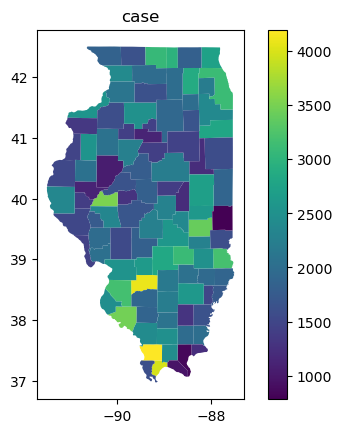

In [17]:
covid.plot(column="cases100k",legend=True)
plt.title("case")

Text(0.5, 1.0, 'case')

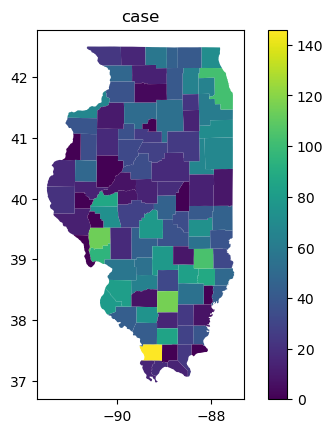

In [18]:
covid.plot(column="deaths100k",legend=True)
plt.title("case")

q1: global Moran's I

In [19]:
## case moran

In [ ]:
bach = covid['cases100k'].values #Get the data we are interested.

w = Queen.from_dataframe(covid) #Generate W matrix using Queen contiguity

w.transform = 'r' #Row-standardization of the weight matrix

In [12]:
from esda.moran import Moran

ga_global_moran = Moran(bach, w, permutations = 199) #199 permutations
ga_global_moran.I

0.11370626275976986

This is indicating a statistically significant clustering in the Pct Bach data.


In [13]:
ga_global_moran.p_sim # P value based on permutation tests

0.04

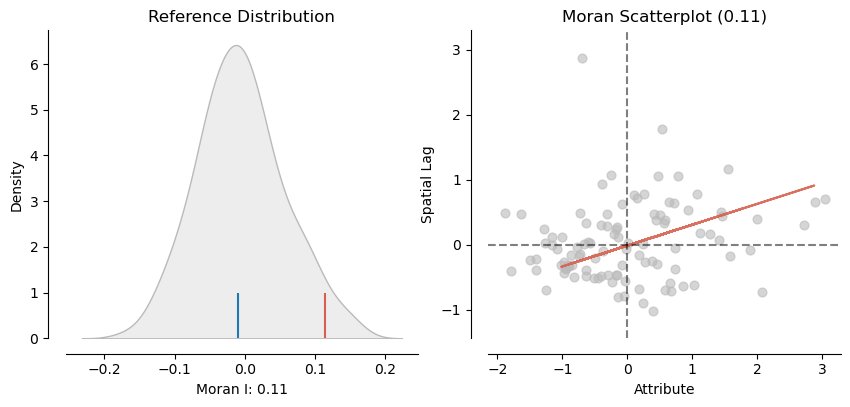

In [14]:
from splot.esda import plot_moran
plot_moran(ga_global_moran, zstandard=True, figsize=(10,4))
plt.show()

Generate a better Moran Scatterplot with significance of the local moran's Is. 

Color code each county with the quadrant it falls into.
- Red: HH
- Light Blue: LH
- Yellow: HL
- Blue: LL

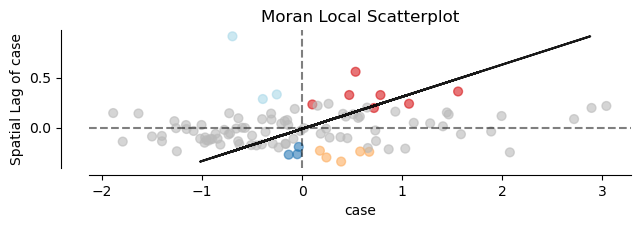

In [16]:
from splot.esda import moran_scatterplot
from esda.moran import Moran_Local
# calculate Moran_Local and plot
ga_moran_loc = Moran_Local(bach, w,permutations=199) #199 permutations for the sig test
fig, ax = moran_scatterplot(ga_moran_loc, p=0.05)
ax.set_xlabel('case')
ax.set_ylabel('Spatial Lag of case')
plt.show()

In [ ]:
## death moranI

In [21]:
bach = covid['deaths100k'].values #Get the data we are interested.

w1 = Queen.from_dataframe(covid) #Generate W matrix using Queen contiguity

w1.transform = 'r' #Row-standardization of the weight matrix

In [22]:
ga_global_moran = Moran(bach, w1, permutations = 199) #199 permutations
ga_global_moran.I

0.04770595267143857

In [23]:
ga_global_moran.p_sim # P value based on permutation tests

0.215

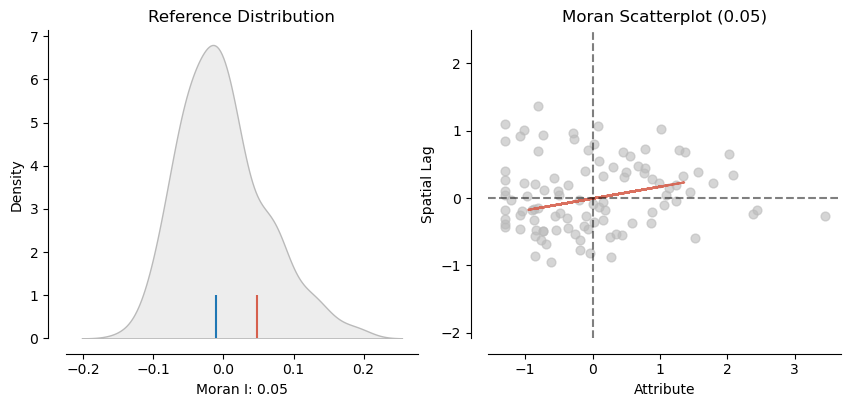

In [24]:
from splot.esda import plot_moran
plot_moran(ga_global_moran, zstandard=True, figsize=(10,4))
plt.show()

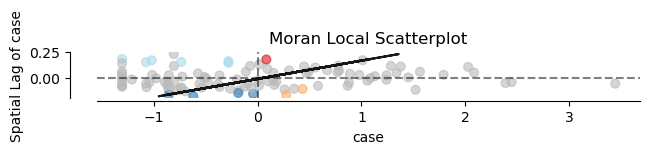

In [25]:
from splot.esda import moran_scatterplot
from esda.moran import Moran_Local
# calculate Moran_Local and plot
ga_moran_loc = Moran_Local(bach, w,permutations=199) #199 permutations for the sig test
fig, ax = moran_scatterplot(ga_moran_loc, p=0.05)
ax.set_xlabel('case')
ax.set_ylabel('Spatial Lag of case')
plt.show()

q2

Create a hot-spot and cold-spot map. 
- HH: High % Bach county surrounded by High % Bach county
- LL: Low-Low
- LH: Low-High
- HL: High-Low
- NS: Non-significant (p>0.05)

(<Figure size 600x600 with 1 Axes>, <AxesSubplot:>)

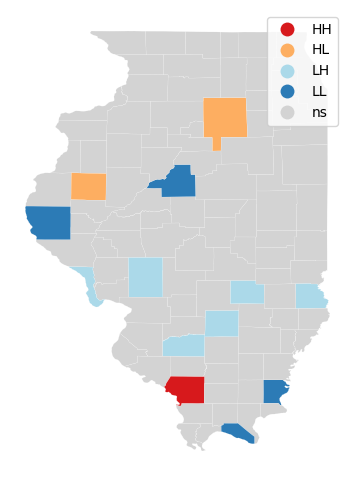

In [26]:
from splot.esda import lisa_cluster
lisa_cluster(moran_loc=ga_moran_loc, gdf=covid, p = 0.05, figsize = (6,6))

q3
1. The traffic is developed or located at the traffic hub, and the flow of people increases the speed of virus transmission.
2. There are more residents, with a large base of cases.
3. There are fewer hospitals in areas where Death is concentrated, and insufficient medical resources cannot be provided to infected residents.